# <div align="center"> A CNN in Python WITHOUT frameworks </div>

In [1]:
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
%matplotlib inline

In [2]:
# 全局配置plot参数
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## zero padding

In [3]:
def zero_pad(X, pad):
    """
    Argument:
        X: numpy array, shape(num_of_images, size_of_height, size_of_width, num_of_channels)
        pad: integer, amount of zero padding
    Return:
        X_pad: numpy_array, shape(num_of_images, size_of_height + 2*pad,
                size_of_width + 2*pad, num_of_channels)
    """
    return np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0,0)) 

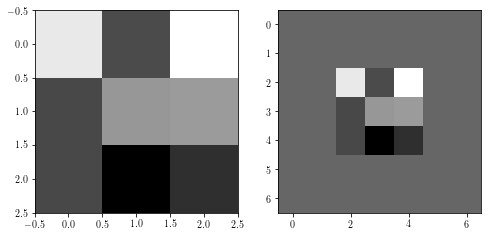

In [4]:
# test zero_pad
TX = np.random.randn(4, 3, 3, 2)
TX_pad = zero_pad(TX, 3-1)
TX.shape, TX_pad.shape
fig, axes = plt.subplots(1, 2, figsize=(8,12))
axes[0].imshow(TX[0,:,:,0])
axes[1].imshow(TX_pad[0,:,:,0])

## convolute one slice matrix

In [5]:
def conv_single_step(slice_matrix, W, b):
    """
    Argument:
        slice_matrix: numpy array, the slice matrix by moving filter(kernel) selected. (h, w, c)
        W: numpy array, filter weights parameters containded in a window - matrix of shape(h, w, c)
        b: filter bias parameters in a window
    Return:
        Z: result of convoluting by sliding the window (W, b) on a slice matrix slice_matrix.
    """
    return np.sum(np.multiply(slice_matrix, W)) + b # element-wise multiply, then sum + b

In [6]:
# test conv_single_step
slice_matrix = np.random.randn(4, 4, 3)
TW = np.random.randn(4, 4, 3)
Tb = np.random.randn(1, 1, 1)
conv_single_step(slice_matrix, TW, Tb)

array([[[-0.45100213]]])

## feed forward

In [7]:
def conv_forward_propagation():
    pass

In [8]:
# gunzip t*-ubytez
dataset_dir = '/home/lidong/Datasets/ML/mnist' 
X, Y = loadlocal_mnist(
        images_path = dataset_dir + '/train-images-idx3-ubyte', 
        labels_path = dataset_dir + '/train-labels-idx1-ubyte')

In [9]:
type(X), X.shape, type(X[0]), X[0].shape, type(Y), Y.shape

(numpy.ndarray, (60000, 784), numpy.ndarray, (784,), numpy.ndarray, (60000,))

In [10]:
def target_to_onehot(y):
    t = np.zeros((10, 1))
    t[int(y)] = 1.0
    return t

In [11]:
data = [(x.reshape(-1,), target_to_onehot(y)) for x, y in zip(X, Y)]

In [12]:
# a = np.random.randn(3,3,3)
a = np.zeros((3,3,3))
a

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [13]:
b = a + np.array([[1],[2],[3]])